In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set_style("whitegrid")
sns.set_style("darkgrid")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Prepare data like in the [r version](http://www.logarithmic.net/pfh-files/blog/01509162940/scatter.html)

In [3]:
n = 10000
figsize = 9, 8
np.random.seed(1234)
x = 1.25 ** np.random.standard_normal(n)
y = 2 ** np.random.standard_normal(n)
df = pd.DataFrame(dict(x=x, y=y))

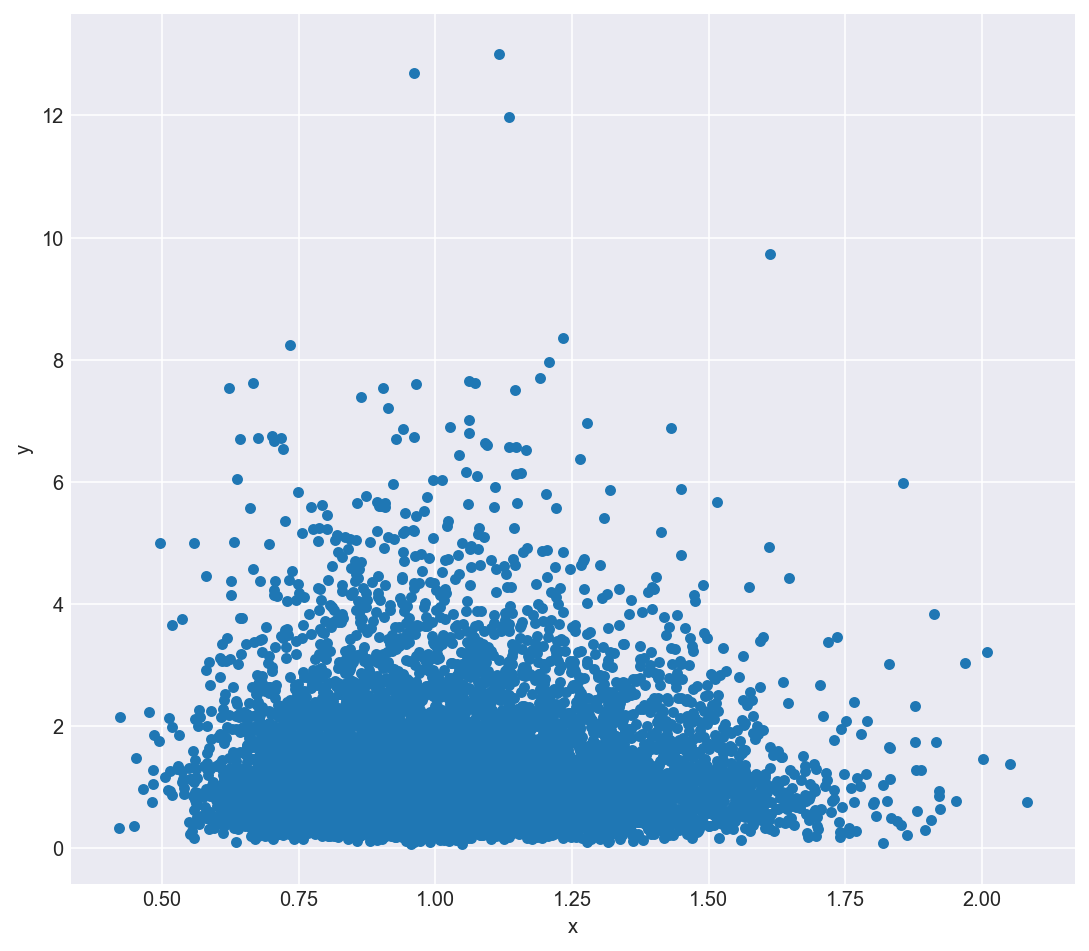

In [4]:
ax = df.plot.scatter('x', 'y', figsize=figsize)

## First attempt to create an similar plot just by using a kernel density plot

There's no kde plot including a scatter plot of the points, so I just create two plots and the kde plot on top of the scatter plot. It looks ok, but it's not quite the same.

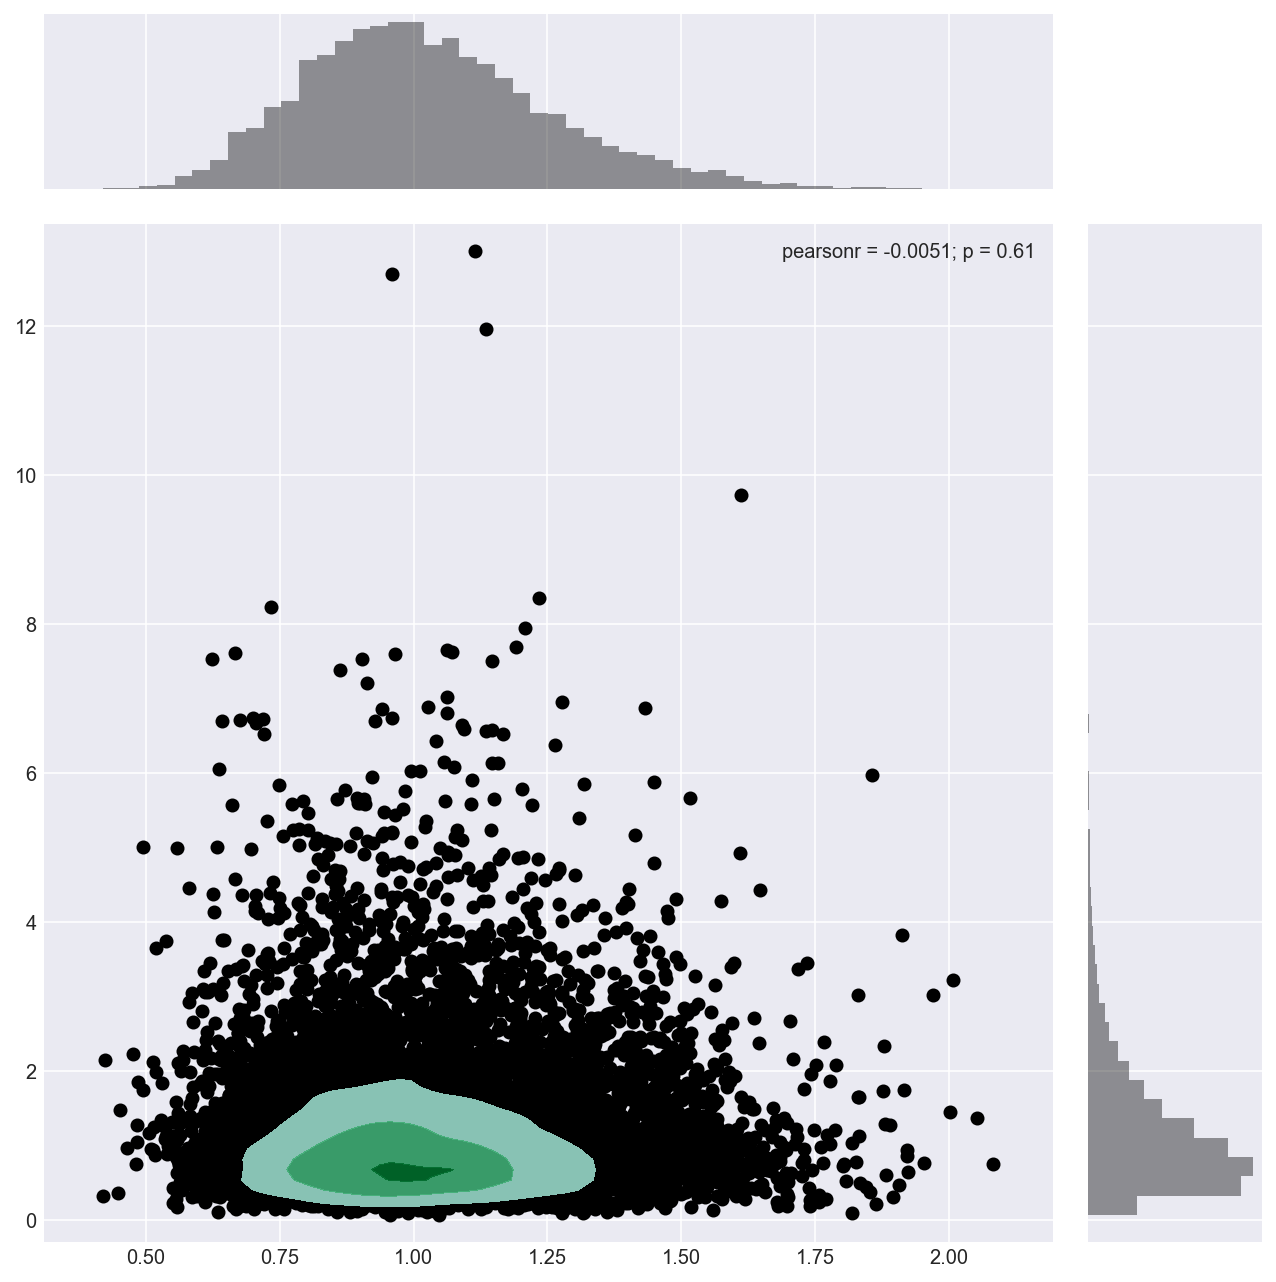

In [5]:
ax = (sns.jointplot(x, y, color='k', size=9)
         .plot_joint(sns.kdeplot, zorder=1, n_levels=3, shade=True,
                     shade_lowest=False, alpha=.9))

## Ok, let's calculate the quantiles

To get the quartiles the get_quantiles function executes following three steps:
1. Get k nearest points for each observation using a [KDTree](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KDTree.html)
2. Get the mean distance of all k nearest neighbors and interpret this number as a density
3. Use [pandas qcut](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html) to discretizate the densities into quartiles

In [6]:
from sklearn.neighbors import KDTree

def get_quantiles(X, k=25, n=4):
    kdt = KDTree(X, leaf_size=30, metric='euclidean')
    dists = kdt.query(X, k=k, return_distance=True)[0]
    densities = dists.mean(axis=1)
    return pd.qcut(densities, n, labels=range(n))

## Use the quantiles for plotting

Two more steps are needed to be able to create a similar plot:
1. Map quantiles to colors
2. Sort dataframe by quantile, so that quantiles with higher density get plotted on top of those with lower density

In [7]:
df['quartile'] = get_quantiles(df[['x', 'y']].values, n=4)

# colors = ['r', 'y', 'g', 'b']
colors = ['#FDE724', '#34B779', '#31688E', '#440154']
df['colors'] = df.quartile.apply(lambda x: colors[x])

df = df.sort_values(by='quartile', ascending=False)

## Final result

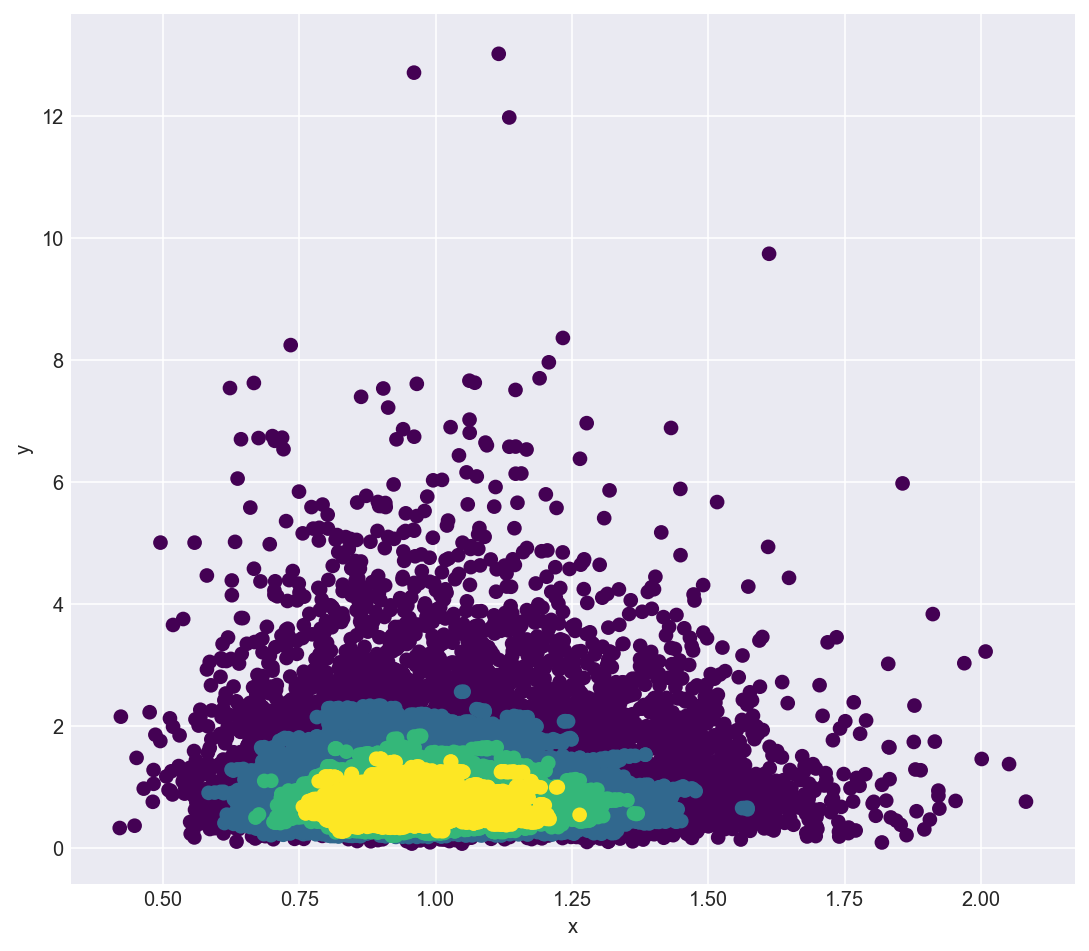

In [8]:
ax = df.plot.scatter('x', 'y', c=df.colors, figsize=figsize, s=40)